!pip install yake
!pip install matplotlib
!pip install spacy
!pip install nltk
!python -m spacy download pt_core_news_sm

In [2]:
#pip install yake
#pip install matplotlib
#pip install spacy
#python -m spacy download en_core_web_sm


In [3]:
#pip install spacy textblob autocorrect

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import yake
import re
import matplotlib.pyplot as plt
import spacy
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import metrics
nlp = spacy.load('en_core_web_sm')

In [5]:
def remove_stopwords(text):
    doc = nlp(text)
    tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not re.match(r'^[@¦\x9f\x92â\x80]+$', token.text)]
    filtered_text = ' '.join(tokens)
    return filtered_text

In [6]:
def tokenizar(text):
    doc = nlp(text)
    tokens = [token.text for token in doc]
    return tokens

In [7]:
def lemmatizar_tokens(tokens):
    doc = spacy.tokens.Doc(nlp.vocab, words=tokens)
    lemmatized_tokens = [token.lemma_ for token in nlp(doc)]
    return lemmatized_tokens

In [8]:
def correct_spelling(text):
    corrected_text = spell(text)
    return corrected_text

In [9]:
def correct_grammar(text):
    blob = TextBlob(text)
    corrected_text = str(blob.correct())
    return corrected_text

In [10]:
def correct_text(text):
    text = correct_spelling(text)
    text = correct_grammar(text)
    return text

In [14]:
def plot(y_test,y_pred):
  cm = confusion_matrix(y_test,y_pred)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                        display_labels = [False, True])
  cm_display.plot()
  plt.show()

In [12]:
def preprocess_data(data_path):
    df = pd.read_csv(data_path)
    df.dropna(inplace=True)
    df['text_processed'] = df['tweet'].apply(lambda x: remove_stopwords(x))
    df['text_tokens'] = df['text_processed'].apply(lambda x: tokenizar(x))
    df['text_lemmatized'] = df['text_tokens'].apply(lambda x: lemmatizar_tokens(x))
    df['text_final'] = df['text_lemmatized'].apply(lambda tokens: ' '.join(tokens))
    return df['text_final'], df['label']

In [13]:
def train(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
    vectorizer = CountVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    clf = MultinomialNB()
    clf.fit(X_train_vec, y_train)
    y_pred = clf.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    plot(y_test,y_pred)
    print("Acurácia do modelo:", accuracy)
    return clf, vectorizer, accuracy

In [16]:
X, y = preprocess_data('Twitter Sentiments.csv')
train(X, y)

In [ ]:
def plot_keyword_scores(keywords):
    keywords.sort(key=lambda x: x[1])
    keywords_list, scores_list = zip(*keywords)
    plt.figure(figsize=(20, 10))
    plt.bar(keywords_list, scores_list)
    plt.xlabel("Keywords")
    plt.ylabel("Scores")
    plt.title("Keyword Scores")
    plt.show()

In [ ]:
def extract_keywords(X, y, label, language='pt', n=1, k=20):
    data_label = X[y == label]
    data_label = ' '.join(data_label.astype(str))
    keyword_extractor = yake.KeywordExtractor(lan=language, n=n, top=k)
    keywords = keyword_extractor.extract_keywords(data_label)
    keywords.sort()
    return keywords

In [ ]:
keywords0 = extract_keywords(X, y, 0)


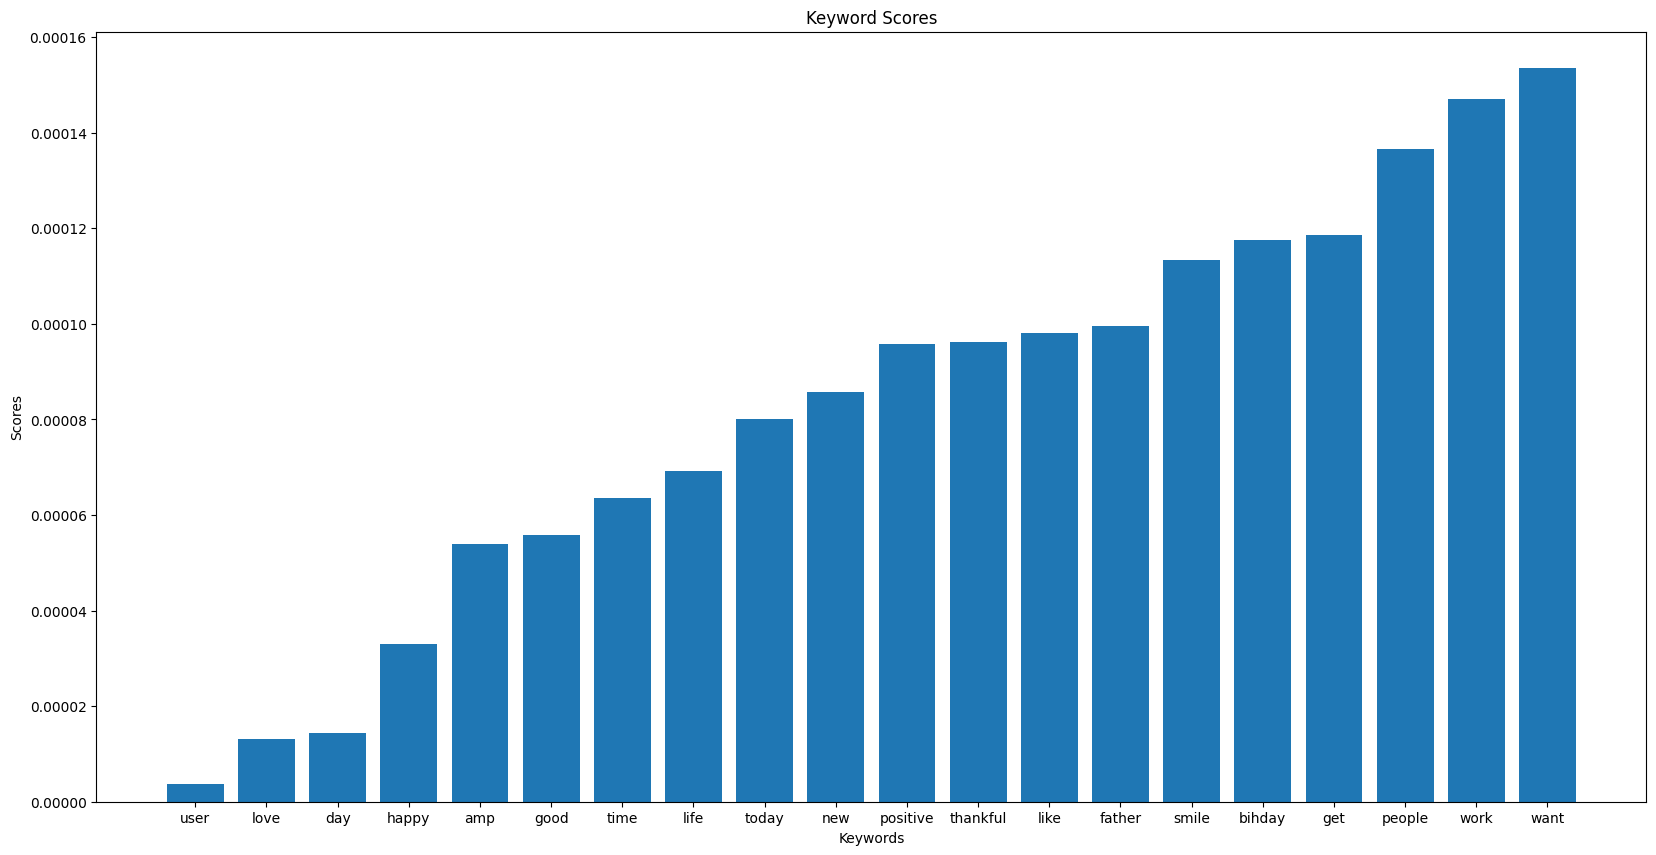

In [ ]:
plot_keyword_scores(keywords0)


In [ ]:
keywords1 = extract_keywords(X, y, 1)


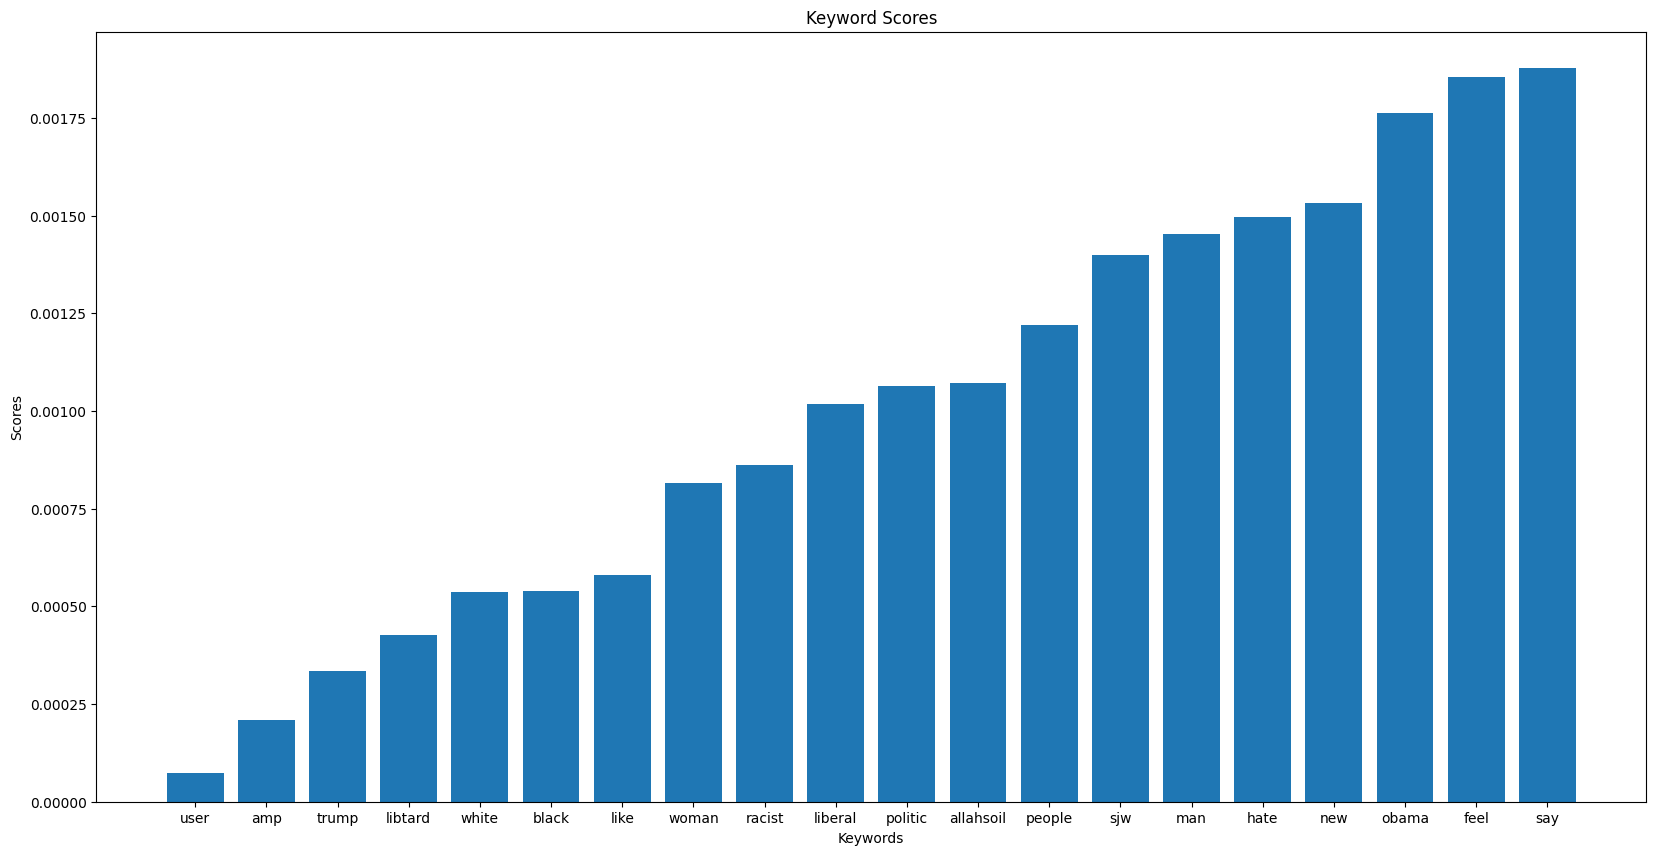

In [ ]:
plot_keyword_scores(keywords1)

In [ ]:
docs = [nlp(texto) for texto in X[:20]]

# Calcular e imprimir a similaridade entre todos os pares de textos
for i, doc1 in enumerate(docs):
    for j, doc2 in enumerate(docs):
        if i != j:  # Evitar comparar um texto com ele mesmo
            similaridade = int(doc1.similarity(doc2) * 100)
            print("{} é {}% similar a {}".format(X[i], similaridade, X[j]))

   @us father dysfunctional selfish drag kid dysfunction     run é 70% similar a @user @user thank lyft credit use cause offer wheelchair van pdx      disapointe getthanke
   @us father dysfunctional selfish drag kid dysfunction     run é 73% similar a     bihday majesty
   @us father dysfunctional selfish drag kid dysfunction     run é 69% similar a model     love u u time urð± ðððð   ð ð ð  
   @us father dysfunctional selfish drag kid dysfunction     run é 76% similar a    factsguide society      motivation
   @us father dysfunctional selfish drag kid dysfunction     run é 80% similar a 2/2 huge fan fare big talk leave chaos pay dispute allshowandnogo  
   @us father dysfunctional selfish drag kid dysfunction     run é 45% similar a    @us camping tomorrow @user @user @user @user @user @user @us dannyâ
   @us father dysfunctional selfish drag kid dysfunction     run é 62% similar a school year year exams.ð¯ think ð­ school exam     hate imagine actorslife re

<ipython-input-99-c00ead03f983>:7: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similaridade = int(doc1.similarity(doc2) * 100)
